# <center> TP MAISON : PREPROCESSING</center>

## I. Exploratory Data Analysis

Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import Dataframe

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Q1 : Quelle est la forme du Dataframe ?

In [4]:
df.shape

(7613, 5)

Le dataframe est de la forme (7613,5) il a donc 5 colonnes (id,keyword,location,text,target) et 7613 lignes

Q2. Y a t-il des valeurs manquantes ou des valeurs dupliquées ?

In [5]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['location'], axis = 1, inplace = True) 

In [8]:
df.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.isna().sum()

id          0
keyword    61
text        0
target      0
dtype: int64

In [10]:
df.drop(['id'], axis = 1, inplace = True) 

In [11]:
df.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

keyword    0
text       0
target     0
dtype: int64

In [14]:
df.head()

,keyword,text,target
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,Crying out for more! Set me ablaze,0
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


On test les valeurs manquantes et les valeurs dupliquées. On obtient 61 valeurs manquantes dans la colonne keyword et 2533 dans la colonne location. Dans les autres colonnes aucune valeur manquante. En ce qui concerne les doublons, aucune doublon de lignes dans le dataset. 

Q3. Quelles sont les colonnes qui vont nous intéresser ?

In [15]:
df.head()

,keyword,text,target
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,Crying out for more! Set me ablaze,0
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [16]:
df['target'].unique()

array([1, 0], dtype=int64)

Toutes les colonnes vont nous intéressés mis a part la colonne ID si nous faisons du machine learning. Mais dans le cas du NLP actuel, les colonnes qui nous intéressent sont text et target (le texte et la target du text), on pourrait également predre en compte la colonne keyword qui retourne les mots clés.

Q4. Y a-t-il des données aberrantes ou des incohérences majeures
dans les données ?

In [25]:
df.dtypes

keyword    object
text       object
target      int64
dtype: object

In [27]:
df['keyword'].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

On remarque dans la colonne keyword que %20 représente un espace en unicode (a replace plus tard)

In [28]:
df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
harm                     41
sinking                  41
siren                    40
evacuate                 40
fear                     40
windstorm                40
collided                 40
twister                  40
outbreak                 40
collision                39
famine                   39
wreckage                 39
whirlwind                39
explosion                39
weapons                  39
derailment               39
wrecked                  39
weapon                   39
sunk                     39
flames                   39
earthquake               39
hellfire                 39
sinkhole                 39
blaze                    38
hurricane                38
                         ..
suicide%20bomber         31
obliterate               31
terrorist                31
catastrophic             30
mayhem              

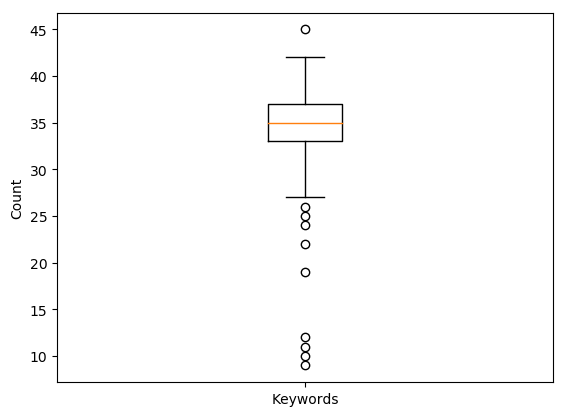

In [32]:
fig, ax = plt.subplots()
ax.boxplot([df["keyword"].value_counts()])
ax.set_xticklabels(["Keywords"])
ax.set_ylabel("Count")
plt.show()

Q5. Y a t-il des tweets anormalement longs / courts ? Peut-on les
considérer comme des outliers ?

In [31]:
df.text.str.len().value_counts()

136    398
139    275
138    256
140    218
137    209
135    191
134    126
133    113
132    112
130     90
91      87
126     84
120     79
100     79
101     78
129     77
87      77
131     77
128     76
122     76
114     75
117     73
85      73
79      72
96      72
92      71
124     71
123     70
88      70
95      69
      ... 
29      17
22      13
28      12
24      12
18      11
19      11
23      10
30      10
20       9
146      9
145      8
17       7
147      7
148      5
21       5
16       4
12       4
14       3
7        3
11       3
15       3
13       2
10       2
150      2
8        2
151      1
152      1
9        1
149      1
157      1
Name: text, Length: 147, dtype: int64

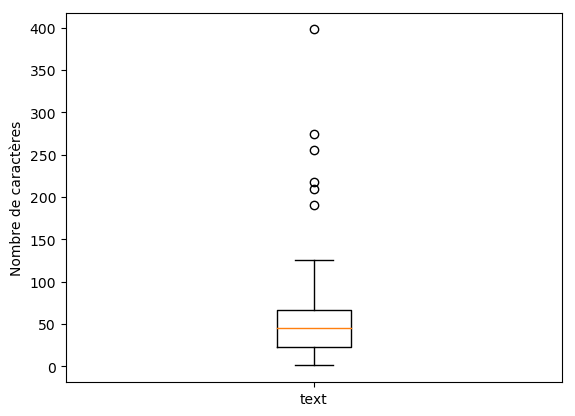

In [34]:
fig, ax = plt.subplots()
ax.boxplot(df.text.str.len().value_counts())
ax.set_xticklabels(["text"])
ax.set_ylabel("Nombre de caractères")
plt.show()

Q6. Quel est le ratio tweet qui parlent de “catastrophes” / tweet
normaux ?

In [28]:
df['target'].value_counts()/df['target'].count()

0    0.572431
1    0.427569
Name: target, dtype: float64

In [52]:
4323+3229

7552

In [55]:
4323/7552 # Tweet Normaux

0.5724311440677966

In [56]:
3229/7552 # Tweet Catastrophes 

0.4275688559322034

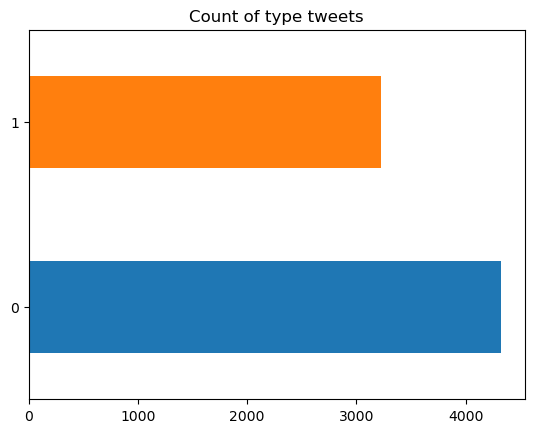

In [30]:
df['target'].value_counts().plot(kind='barh', title= 'Count of type tweets',align='center')

Q7. En regardant quelques tweets au hasard, peut-on deviner
facilement la “target” ?

In [57]:
df.head()

,keyword,text,target
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,ablaze,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,ablaze,Crying out for more! Set me ablaze,0
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0


La colonne target renseigne si le tweet est un tweet normale ou catastrophe

Q8. Peut-on déjà détecter des “patterns” ou des mots clés dans les
tweets?

- Essaie avec le keyword dans le text (1 passe environ 33% a 50%)

In [43]:
df[df["keyword"] == "ablaze"]['target'].value_counts()

0    23
1    13
Name: target, dtype: int64

In [42]:
df[df["text"].str.contains("ablaze")]['target'].value_counts()

0    11
1    10
Name: target, dtype: int64

- Essaie avec la contenance d'un lien

In [44]:
df['target'].value_counts()

0    4323
1    3229
Name: target, dtype: int64

In [45]:
df[df["text"].str.contains("http://")]['target'].value_counts()

1    2037
0    1548
Name: target, dtype: int64